<a href="https://colab.research.google.com/github/jypara/NBD_assigns/blob/master/s20116_Lab5_dz_Samling_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Sampling and quantization

## Nyquist/Shannon sampling theorem

We know what sampling frequency is, but what value should it have? What is the minimum number of sampled (minimal memory use) required to maintain a required signal quality?

The answer is pretty simple, but before we simply give the formula, let's do a couple of experiments to reach the same result emprically. 

Let's generate and draw 1 second of 1 Hz sine with unit amplitude and zero phase. What is the minimum number of samples required to reconstruct the signal? What about 2 Hz? 3 Hz?

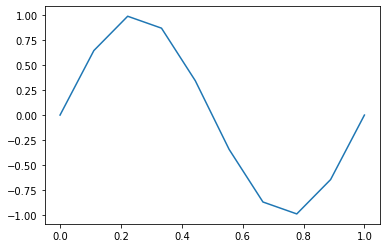

In [ ]:
T=1
ph=0
f=1
FS=10
A=1 
t=linspace(0,T,T*FS)
y=A*sin(2*pi*f*t+ph)
plot(t,y)


The above exercise may not be obvious, so let's tackle the problem from the other direction. Let's assume a constant sampling frequency of 10 Hz. What signals can we reconstruct using only 10 samples? What does a 1 Hz signal look like? 4 Hz? 5 Hz? 6 Hz? 9 Hz? 10 Hz? 11 Hz? Try generating other frequencies. Which signals look the same and which differ? 

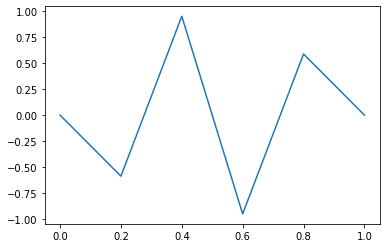

In [ ]:
T=1 
ph=0
f=8
FS=6
A=1 
t=linspace(0,T,T*FS)
y=A*sin(2*pi*f*t+ph)
plot(t,y)


Let's take a step further. Generate a sine whose frequency parameter is a real variable changing with time instead of a constant. Let's make it change from 1 Hz to double the sampling frequency for a signal of 10 seconds sampled at 1000 Hz. What's goining on with the signal? Play it back. 


(4, 5)

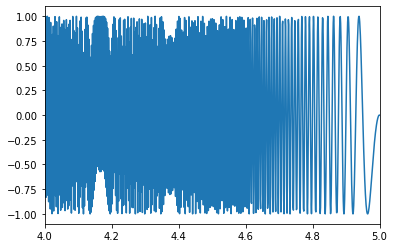

In [ ]:

T=10
FS=1000
f=linspace (1,FS*2,T*FS)
A=1
ph=0
t=linspace(0,T,T*FS)
y=A*sin(2*pi*f*t+ph)
plot(t,y)
xlim(4,5)

Use `specgram` to see the spectrum of the signals (more on that in the next lab). The function takes the signal as the fist argument and sampling frequency as the second. How does the graph correspond to the audio? 

(array([[7.58463919e-06, 4.02363161e-10, 4.32886581e-12, ...,
         7.01568249e-12, 1.25793097e-11, 4.79584170e-07],
        [2.86191493e-05, 8.92743740e-10, 9.06359730e-12, ...,
         1.42705307e-11, 5.74188628e-11, 2.92353814e-06],
        [8.15178313e-05, 1.19205657e-09, 1.03238053e-11, ...,
         1.50096848e-11, 1.65932072e-10, 1.17903413e-05],
        ...,
        [4.34948105e-17, 2.81646936e-15, 6.84130461e-15, ...,
         3.65626900e-14, 1.37098073e-14, 1.87160766e-15],
        [1.31643726e-17, 2.74585457e-15, 6.61717042e-15, ...,
         3.61805905e-14, 1.36135171e-14, 1.85868402e-15],
        [1.53891731e-18, 1.36120744e-15, 3.27143725e-15, ...,
         1.80267612e-14, 6.79071647e-15, 9.27199474e-16]]),
 array([  0.     ,   3.90625,   7.8125 ,  11.71875,  15.625  ,  19.53125,
         23.4375 ,  27.34375,  31.25   ,  35.15625,  39.0625 ,  42.96875,
         46.875  ,  50.78125,  54.6875 ,  58.59375,  62.5    ,  66.40625,
         70.3125 ,  74.21875,  78.125  ,  8

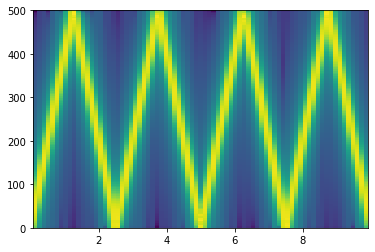

In [ ]:
specgram(y,Fs=FS)

# Bit resolution

Open a WAV file using the standard `wave` library and print the parameters stored in the file (use `getparams` method). You can find the documentation of the library here:

https://docs.python.org/3/library/wave.html

The library relies on the standard header written in the file:

http://soundfile.sapp.org/doc/WaveFormat/

In [ ]:
import wave
from IPython.display import Audio

!wget https://danijel3.github.io/PSO_lecture/ćwiczenia/zdanie.wav

--2019-11-06 17:34:35--  https://danijel3.github.io/PSO_lecture/%C4%87wiczenia/zdanie.wav
Resolving danijel3.github.io (danijel3.github.io)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to danijel3.github.io (danijel3.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 540980 (528K) [audio/wav]
Saving to: ‘zdanie.wav.1’

zdanie.wav.1        100%[===================>] 528.30K  --.-KB/s    in 0.06s   

2019-11-06 17:34:35 (7.95 MB/s) - ‘zdanie.wav.1’ saved [540980/540980]



Load the file in the memory, but for ease of use it's much more convenient to use the scipy library:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

Draw and play back the file.

In [ ]:
AAA = wave.open('zdanie.wav', mode='rb')
params=AAA.getparams() 
print(params)

_wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=270468, comptype='NONE', compname='not compressed')


Perform quantization of the file using a lower amount of bits per samples. Play the sound and compare it to the original. What can you hear? Calculate the difference between the original and the quantized version and play it back. What is the main property of this difference?

Use the `hist` function (from matplotlib) to draw the histogram of the difference. How does the difference change wrt the number of bits?

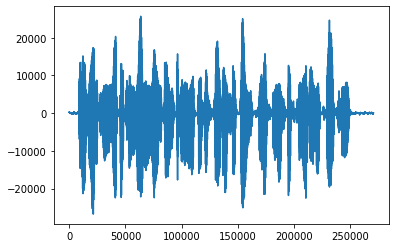

In [ ]:
from scipy.io import loadmat
from scipy.io.wavfile import read
from IPython.display import Audio
#Audio(i,rate=samp_freq)

Fs,y=read("zdanie.wav")
figure()
plot(y)
Audio(y,rate=Fs)

# Homework

## Task 1

Load the audio from the file and reduce its sampling frequency by half. You can do this by simply copying every second sample.
From the experiments above we know we should expect aliasing to occur. Draw the spectrum of the file before and after the change of sampling frequency.
Can you show where the aliasing occurs?

In [ ]:
!wget https://danijel3.github.io/PSO_lecture/%C4%87wiczenia/zdanie.wav

--2019-11-24 22:06:11--  https://danijel3.github.io/PSO_lecture/%C4%87wiczenia/zdanie.wav
Resolving danijel3.github.io (danijel3.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to danijel3.github.io (danijel3.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 540980 (528K) [audio/wav]
Saving to: ‘zdanie.wav’

zdanie.wav          100%[===================>] 528.30K  --.-KB/s    in 0.05s   

2019-11-24 22:06:16 (10.1 MB/s) - ‘zdanie.wav’ saved [540980/540980]



Populating the interactive namespace from numpy and matplotlib


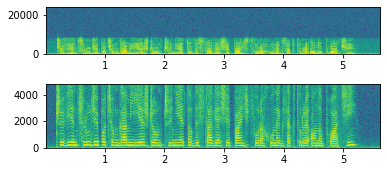

In [ ]:
%pylab inline

from scipy.io.wavfile import read

Fs,y=read('zdanie.wav')
subplot(4,1,1)
_=specgram(y,Fs=Fs)

L=5
Y=y[::L]
Fs/=L
subplot(3,1,2)
specgram(Y,Fs=Fs)

from IPython.display import Audio
Audio(Y,rate=Fs)

## Task 2

Load the signal from the file and perform quantization on all different levels. Measure the SNR of the signal and plot a graph comparing SNR to bit depth.
Do the same for SNR measured in dB. Which plot is more useful?

Populating the interactive namespace from numpy and matplotlib


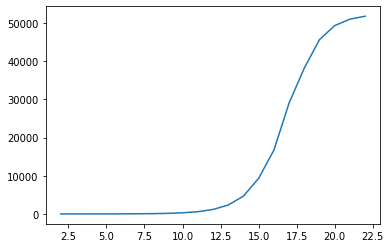

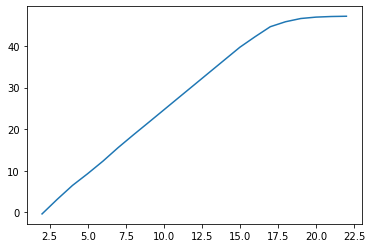

In [ ]:
%pylab inline

from scipy.io.wavfile import read

import math

Fs,yy=read('zdanie.wav')

def snr(B):
  L=2**B
  y=yy.astype(float)
  y=(y+1)-y.min() 
  y=(y-1)/y.max()
  oy=y
  y=y*(L-1)
  y=floor(y)
  y=y/y.max()
  err=oy-y
  y=y-1.5
  SNR=oy.std(0)/err.std(0)
  return SNR

maxB=23
S=[snr(i) for i in range(2,maxB)]
plot(range(2,maxB),S)

figure()
S=[10*math.log(S[i],10) for i in range(len(S))]
plot(range(2,maxB),S)

## Zadanie 3

Do the same as above but use $\mu$-law encoding.

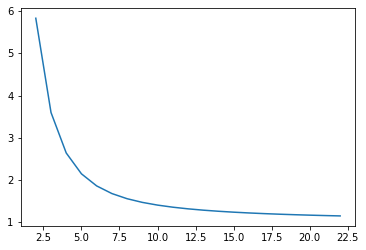

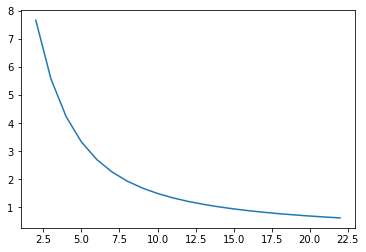

In [ ]:
from scipy.io.wavfile import read

import math as m

Fs,yy=read('zdanie.wav')

def snr(B):
  µ=2**B-1
  y=yy.astype(float)
  y=y+1-y.min() 
  y=(y-1)/y.max()-1
  k=zeros(y.size)

  for i in range(y.size):
    k[i]=sign(y[i])*m.log(1+µ*abs(y[i]),m.e)/m.log(1+µ,m.e)
  
  err=y-k
  SNR=y.std(0)/err.std(0)
  return SNR

maxB=23
S=[snr(i) for i in range(2,maxB)]
plot(range(2,maxB),S)

figure()
S=[10*m.log(S[i],10) for i in range(len(S))]
plot(range(2,maxB),S)